In [47]:
# import necessary packages

import pandas as pd
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [48]:
# read csv file through read_csv pandas method

df = pd.read_csv("Placement_Data_full_Class.csv")

In [49]:
# display 10 rows and all columns from dataset
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [50]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Here we get the description of data present in the dataset

we can see some rows in salary column has 'NaN' as values

also looking at the count row in salary column we get idea that some values are missing

All the rows we see has valur counts as 215 except salary column

We get mean, standard deviation(std), min, median(50%), max values for each numerical value column.

In [51]:
df.shape # Getting the shape.
# it has 215 rows and 15 columns

(215, 15)

### visualisation through ploting various graphs

Text(0, 0.5, 'No. of Students')

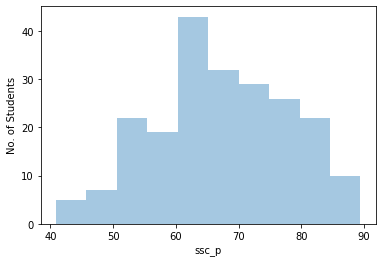

In [52]:
# Graph of x = ssc percentage
# y = No. of Students

sns.distplot(df.ssc_p, kde = False).set_ylabel("No. of Students")

From the graph above we can see that most of the students scored percentage between 60 to 80
where the minimum percentage is approx. 40 and maximun is approx. 89

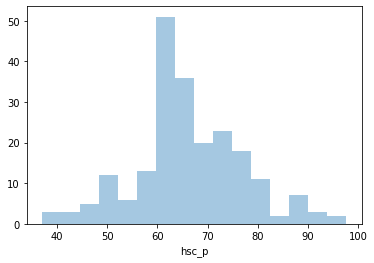

In [53]:
# similarly we plot graphs for hsc, degree, test, mba, salary
sns.distplot(df.hsc_p, kde = False)

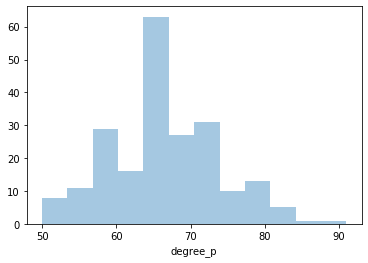

In [54]:
sns.distplot(df.degree_p, kde = False)

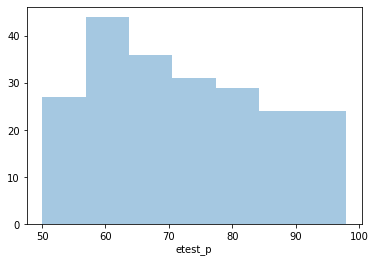

In [55]:
sns.distplot(df.etest_p, kde = False)

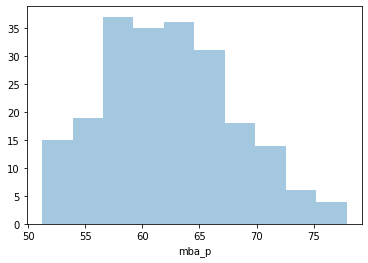

In [56]:
sns.distplot(df.mba_p, kde = False)

## Prediction

In [57]:
df.isnull()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Dropping the serial number column ans salary column as it doesnot persons placement prediction

In [58]:
df = df.drop(['sl_no'], axis = 1)

In [59]:
df = df.drop(['salary'], axis = 1)

In [60]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


so here, as we see there are continuous features or values in ssc_p, hsc_p, degree_p, 

etest_p, mba_p.

we convert continuous values of percentages to percentage bands and create new column as below

In [61]:
# for ssc_p 
# 0 - less than 40
# 1 - Between 40 and 60
# 2 - Between 60 and 80
# 3 - greater then 80

df.loc[df['ssc_p'] <=40, 'ssc_p_band'] = 0
df.loc[(df['ssc_p'] >40) & (df['ssc_p'] <=60), 'ssc_p_band'] = 1
df.loc[(df['ssc_p'] >60) & (df['ssc_p'] <=80), 'ssc_p_band'] = 2
df.loc[df['ssc_p'] >80, 'ssc_p_band'] = 3

# for hsc_p 
# 0 - less than 40
# 1 - Between 40 and 60
# 2 - Between 60 and 80
# 3 - greater then 80

df.loc[df['hsc_p'] <=40, 'hsc_p_band'] = 0
df.loc[(df['hsc_p'] >40) & (df['hsc_p'] <=60), 'hsc_p_band'] = 1
df.loc[(df['hsc_p'] >60) & (df['hsc_p'] <=80), 'hsc_p_band'] = 2
df.loc[df['hsc_p'] >80, 'hsc_p_band'] = 3

# for degree_p 
# 0 - less than 40
# 1 - Between 40 and 60
# 2 - Between 60 and 80
# 3 - greater then 80

df.loc[df['degree_p'] <=40, 'degree_p_band'] = 0
df.loc[(df['degree_p'] >40) & (df['degree_p'] <=60), 'degree_p_band'] = 1
df.loc[(df['degree_p'] >60) & (df['degree_p'] <=80), 'degree_p_band'] = 2
df.loc[df['degree_p'] >80, 'degree_p_band'] = 3

# for etest_p 
# 0 - less than 40
# 1 - Between 40 and 60
# 2 - Between 60 and 80
# 3 - greater then 80

df.loc[df['etest_p'] <=40, 'etest_p_band'] = 0
df.loc[(df['etest_p'] >40) & (df['etest_p'] <=60), 'etest_p_band'] = 1
df.loc[(df['etest_p'] >60) & (df['etest_p'] <=80), 'etest_p_band'] = 2
df.loc[df['etest_p'] >80, 'etest_p_band'] = 3

# for mba_p 
# 0 - less than 40
# 1 - Between 40 and 60
# 2 - Between 60 and 80
# 3 - greater then 80

df.loc[df['mba_p'] <=40, 'mba_p_band'] = 0
df.loc[(df['mba_p'] >40) & (df['mba_p'] <=60), 'mba_p_band'] = 1
df.loc[(df['mba_p'] >60) & (df['mba_p'] <=80), 'mba_p_band'] = 2
df.loc[df['mba_p'] >80, 'mba_p_band'] = 3

In [62]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,ssc_p_band,hsc_p_band,degree_p_band,etest_p_band,mba_p_band
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,2.0,3.0,1.0,1.0,1.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,2.0,2.0,2.0,3.0,2.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,2.0,2.0,2.0,2.0,1.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,1.0,1.0,1.0,2.0,1.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,3.0,2.0,2.0,3.0,1.0


To make decision tree, all data has to de Numerical.

we have to conert the non-numerical columns 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'

into Numerical values.

In [63]:
# pandas has map method that takes dictionary with information on how to convert the values

d = {'Science':1, 'Commerce':2, 'Arts':3}
df['hsc_s'] = df['hsc_s'].map(d)

In [64]:
d = {'Sci&Tech':1, 'Comm&Mgmt':2, 'Others':3}
df['degree_t'] = df['degree_t'].map(d)

d = {'Yes':1, 'No':2}
df['workex'] = df['workex'].map(d)

d = {'Mkt&HR':1, 'Mkt&Fin':2}
df['specialisation'] = df['specialisation'].map(d)

d = {'Placed':1, 'Not Placed':0}
df['status'] = df['status'].map(d)

In [65]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,ssc_p_band,hsc_p_band,degree_p_band,etest_p_band,mba_p_band
0,M,67.00,Others,91.00,Others,2,58.00,1,2,55.0,1,58.80,1,2.0,3.0,1.0,1.0,1.0
1,M,79.33,Central,78.33,Others,1,77.48,1,1,86.5,2,66.28,1,2.0,2.0,2.0,3.0,2.0
2,M,65.00,Central,68.00,Central,3,64.00,2,2,75.0,2,57.80,1,2.0,2.0,2.0,2.0,1.0
3,M,56.00,Central,52.00,Central,1,52.00,1,2,66.0,1,59.43,0,1.0,1.0,1.0,2.0,1.0
4,M,85.80,Central,73.60,Central,2,73.30,2,2,96.8,2,55.50,1,3.0,2.0,2.0,3.0,1.0


Now we drop columns which are not required

In [66]:
df = df.drop(['ssc_b'], axis = 1)
df = df.drop('hsc_b', axis = 1)

In [67]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,ssc_p_band,hsc_p_band,degree_p_band,etest_p_band,mba_p_band
0,M,67.00,91.00,2,58.00,1,2,55.0,1,58.80,1,2.0,3.0,1.0,1.0,1.0
1,M,79.33,78.33,1,77.48,1,1,86.5,2,66.28,1,2.0,2.0,2.0,3.0,2.0
2,M,65.00,68.00,3,64.00,2,2,75.0,2,57.80,1,2.0,2.0,2.0,2.0,1.0
3,M,56.00,52.00,1,52.00,1,2,66.0,1,59.43,0,1.0,1.0,1.0,2.0,1.0
4,M,85.80,73.60,2,73.30,2,2,96.8,2,55.50,1,3.0,2.0,2.0,3.0,1.0


Then we have to separate feature and target columns

featues columns are the columns from which we try predict from.

target column is the column with values we try to predict.

In [68]:
# first we try to take features such as 'ssc_p_band, hsc_p, workex, degree_t, degree_p_band'

features = ['ssc_p_band', 'hsc_p_band', 'workex', 'degree_t', 'degree_p_band']

X = df[features] # feautres column
y = df['status'] # target column


Now we create actual decision tree, fit it with the details and save a png on the computer

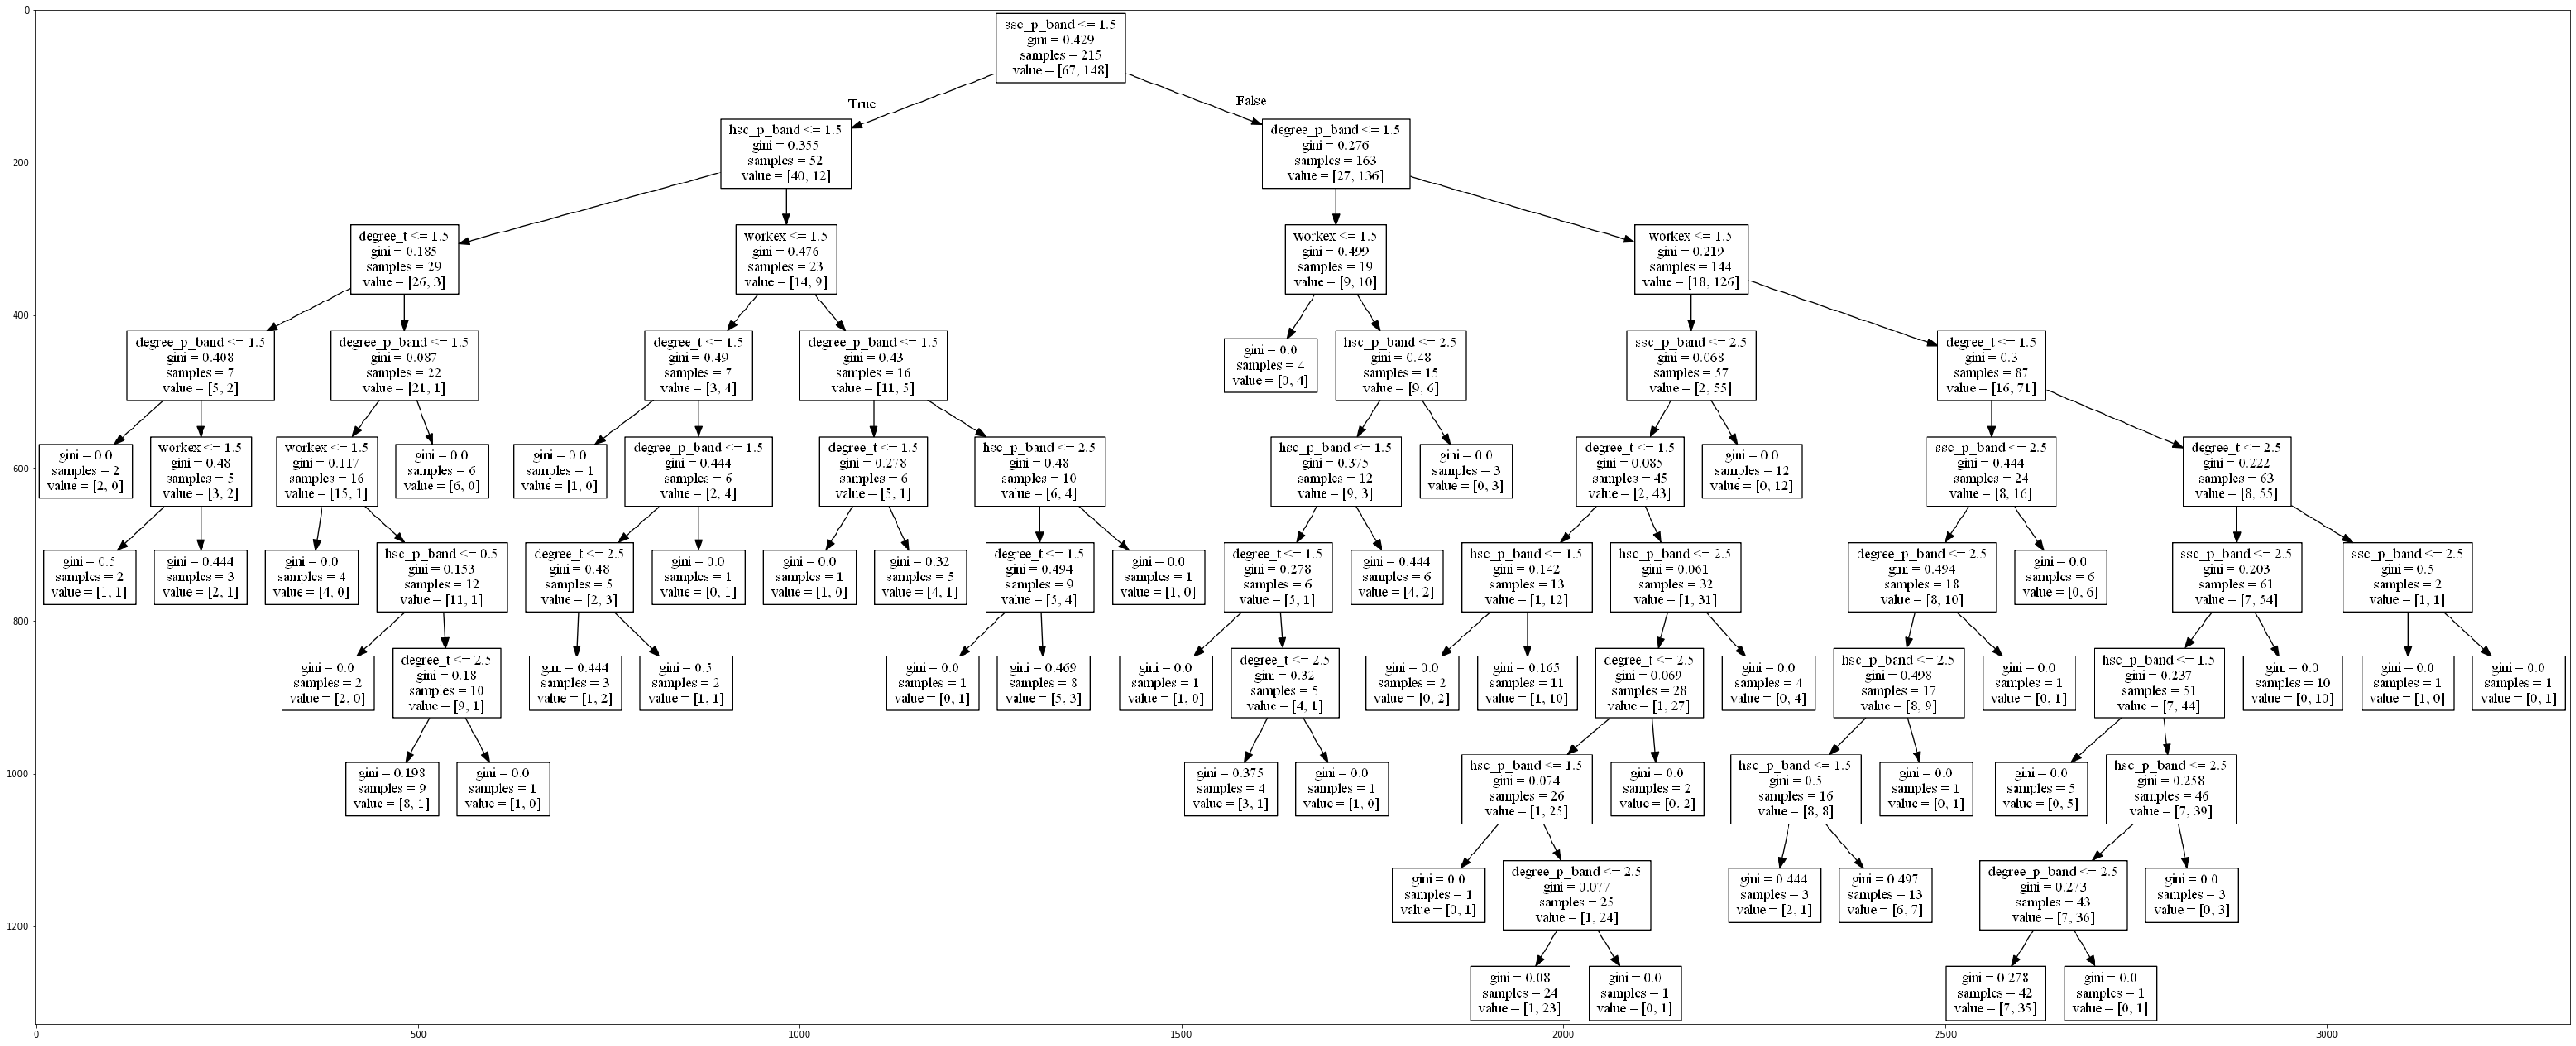

In [69]:
# we have imported the os to give graphviz location to the classifier
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\harsh\anaconda3\graphviz-2.38\release\bin' 
# loaction of my graphviz bin folder
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)

plt.figure(figsize=(50, 50))
data  = tree.export_graphviz(dtree, out_file = None, feature_names = features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png("mydecisiontree.png")

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)


plt.show()

In [70]:
# now we try to predict the values of status using predict method
# values Explained here...
# 2 - ssc percentage between 40 and 60
# 2 - hsc percentage between 40 and 60
# 0 - work experience No
# 1 - degree_t is Sci&Tech
# 2 - degree percentage between 40 and 60

# [1] means Placed
# [0] means Not Placed
print(dtree.predict([[2,2,0,1,2]]))

[1]


In [73]:
print(dtree.predict([[1,2,0,1,2]]))

[0]


In [74]:
val = dtree.predict([[1,2,0,1,2]])
if val == 1:
    print("Placed")
else:
    print("Not Placed")

Not Placed
